In [16]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [17]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [19]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
# x_train = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
x_train = np.asanyarray(train_set[['size','max_levels']])
y_train = np.asanyarray(train_set[['price']])
MLR_model.fit(x_train, y_train)
print("Coefficients: \n", MLR_model.coef_)
print("Theta0: \n", MLR_model.intercept_)

Coefficients: 
 [[ 747.04795007 -393.4032521 ]]
Theta0: 
 [1341.57534414]


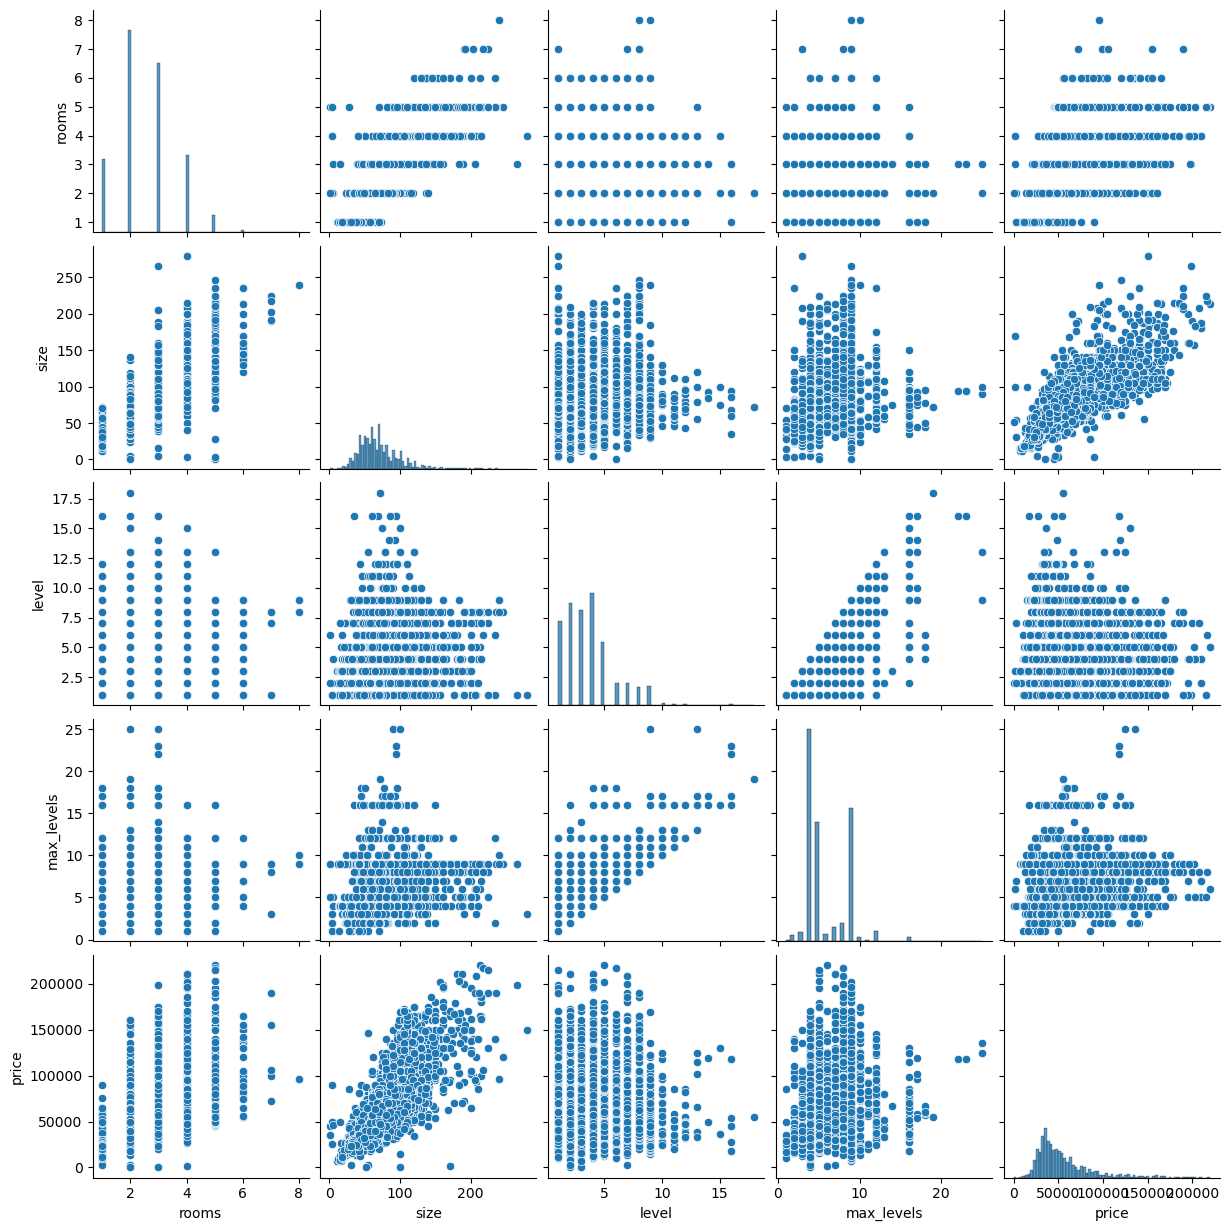

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['rooms', 'size', 'level', 'max_levels', 'price']])
plt.show()

In [22]:
# x_test = np.asanyarray(test_set[['rooms', 'size', 'level', 'max_levels']])
x_test = np.asanyarray(test_set[['size','max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_pred = MLR_model.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7193.9223780657785
RMSE=12635.660248895361
